# Learning

The shallowest network is one that has no hidden layers at all. But this type of network can only solve one type of problem: those that are linearly separable. This notebook explores learning linearly and non-lineraly separable datasets.

## Linearly Separable

In [1]:
from conx import *
import random

conx, version 3.4.3
Using Theano backend.


First, let's construct a fake linearly-separable dataset.

In [2]:
count = 500

positives = [(i/count, i/(count * 2) + random.random()/6) for i in range(count)]
negatives = [(i/count, 0.3 + i/(count * 2) + random.random()/6) for i in range(count)]

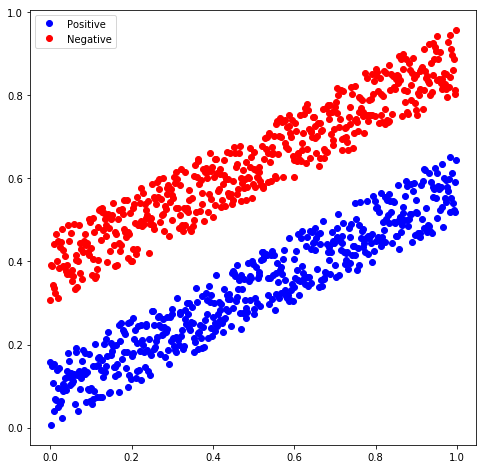

In [3]:
scatter([
         ["Positive", "bo", positives], 
         ["Negative", "ro", negatives],
        ], height=8.0, width=8.0)

In [4]:
ds = Dataset()

In [5]:
ds.load([(p, [ 1.0]) for p in positives] +
        [(n, [ 0.0]) for n in negatives])

In [6]:
ds.shuffle()

In [7]:
ds.split(.1)

In [8]:
ds.summary()

Input Summary:
   count  : 1000 (900 for training, 100 for testing)
   shape  : [(2,)]
   range  : (0.0, 0.99800003)
Target Summary:
   count  : 1000 (900 for training, 100 for testing)
   shape  : [(1,)]
   range  : (0.0, 1.0)


In [9]:
net = Network("Linearly Separable", 2, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

In [10]:
net.set_dataset(ds)

In [11]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=1, options=('input', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [12]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 900
      correct: 0
      incorrect: 900
Total percentage correct: 0.0
Testing validation dataset with tolerance 0.1000...
Total count: 100
      correct: 0
      incorrect: 100
Total percentage correct: 0.0


In [13]:
net.reset()

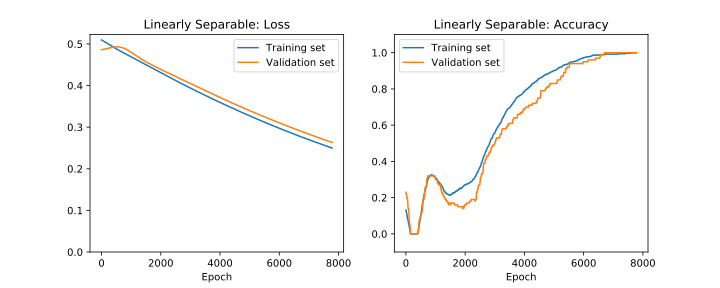

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
# 7783 |   0.24981 |   1.00000 |   0.26325 |   1.00000 


In [14]:
net.train(epochs=10000, accuracy=1.0, report_rate=50, 
          tolerance=0.4, batch_size=len(net.dataset.train_inputs), 
         plot=True)

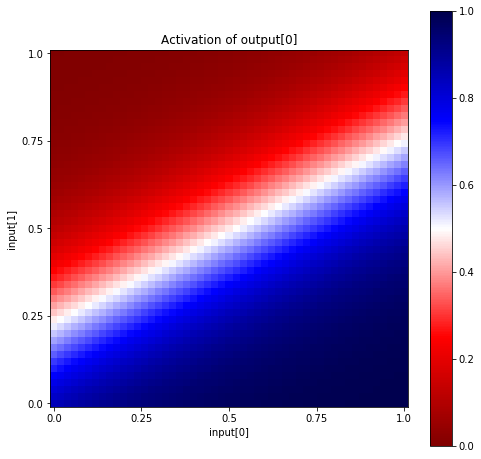

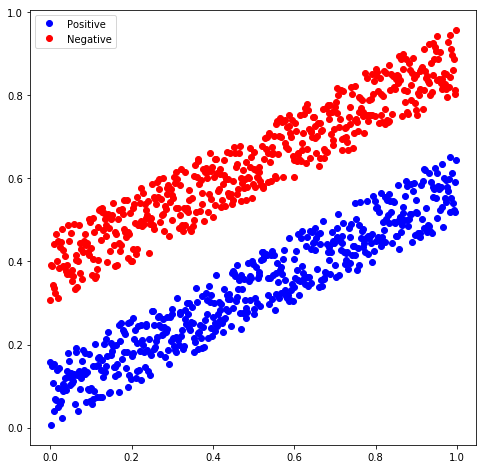

In [15]:
net.plot_activation_map()
scatter([
         ["Positive", "bo", positives], 
         ["Negative", "ro", negatives],
        ], height=8.0, width=8.0)

In [16]:
net.get_weights("output")

[[[3.823367118835449], [-7.374340057373047]], [1.6945483684539795]]

In [17]:
from conx.activations import sigmoid

def output(x, y):
    wts = net.get_weights("output")
    return sigmoid(x * wts[0][1][0] + y * wts[0][0][0] + wts[1])[0]

def ascii(f):
    return "%4.1f" % f

In [18]:
for y in frange(0, 1.1, .1):
    for x in frange(1.0, 0.1, -0.1):
        print(ascii(output(x, y)), end=" ")
    print()

 0.0  0.0  0.0  0.0  0.1  0.1  0.2  0.4  0.6 
 0.0  0.0  0.0  0.0  0.1  0.2  0.3  0.5  0.6 
 0.0  0.0  0.0  0.1  0.1  0.2  0.4  0.6  0.7 
 0.0  0.0  0.0  0.1  0.2  0.3  0.5  0.7  0.8 
 0.0  0.0  0.1  0.1  0.2  0.4  0.6  0.7  0.9 
 0.0  0.0  0.1  0.2  0.3  0.5  0.7  0.8  0.9 
 0.0  0.1  0.1  0.2  0.4  0.6  0.7  0.9  0.9 
 0.0  0.1  0.2  0.3  0.5  0.7  0.8  0.9  0.9 
 0.1  0.1  0.2  0.4  0.6  0.7  0.9  0.9  1.0 
 0.1  0.2  0.3  0.5  0.7  0.8  0.9  0.9  1.0 
 0.1  0.2  0.4  0.6  0.7  0.9  0.9  1.0  1.0 


In [19]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=1, options=('input', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

# Non-Linearly Separable

In [20]:
import math

In [21]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [22]:
negatives = []
while len(negatives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d > 0.375 and d < 0.5:
        negatives.append([x, y])
positives = []
while len(positives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d < 0.25:
        positives.append([x, y])

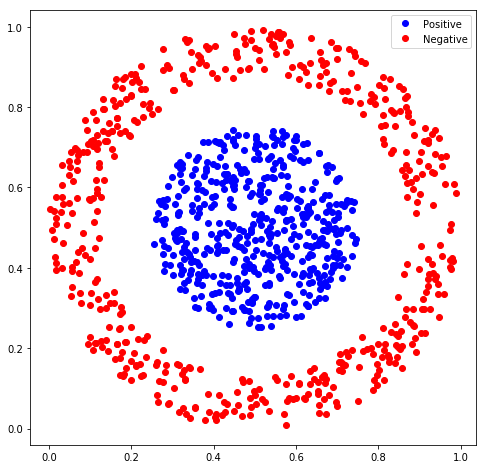

In [23]:
scatter([
         ["Positive", "bo", positives], 
         ["Negative", "ro", negatives],
        ], height=8.0, width=8.0)

In [24]:
net = Network("Non-Linearly Separable", 2, 5, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

In [25]:
net

<IPython.core.display.Javascript object>

<Network name='Non-Linearly Separable' (compiled)>

In [26]:
ds = Dataset()

In [27]:
ds.load([(p, [ 1.0]) for p in positives] +
        [(n, [ 0.0]) for n in negatives])

In [28]:
ds.shuffle()

In [29]:
ds.split(.1)

In [30]:
net.set_dataset(ds)

In [31]:
net.test()

Testing train dataset with tolerance 0.1000...
Total count: 900
      correct: 0
      incorrect: 900
Total percentage correct: 0.0
Testing validation dataset with tolerance 0.1000...
Total count: 100
      correct: 0
      incorrect: 100
Total percentage correct: 0.0


In [32]:
net.reset()

You may want to either `net.reset()` or `net.retrain()` if the following cell doesn't complete with 100% accuracy. Calling `net.reset()` may be needed if the network has landed in a local maxima; `net.retrain()` may be necessary if the network just needs additional training.

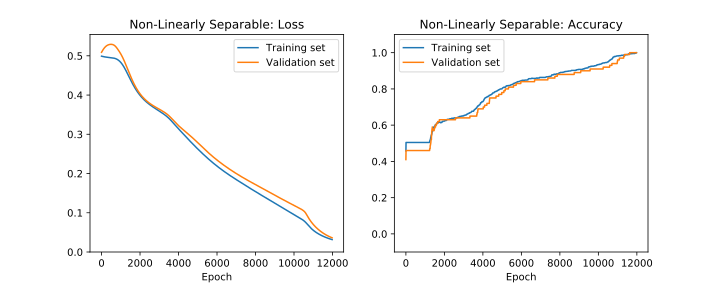

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#11980 |   0.03160 |   1.00000 |   0.03611 |   1.00000 


In [35]:
net.train(epochs=10000, accuracy=1.0, report_rate=50, 
          tolerance=0.4, batch_size=len(net.dataset.train_inputs), 
         plot=True)

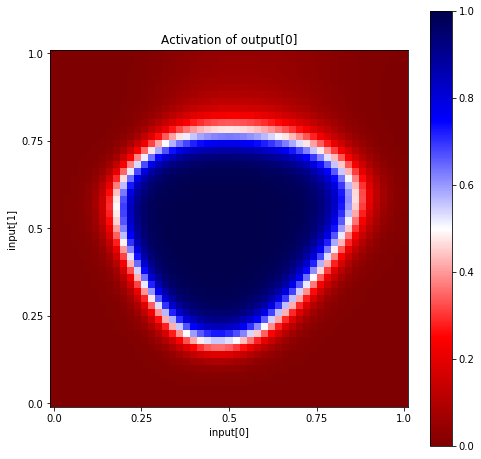

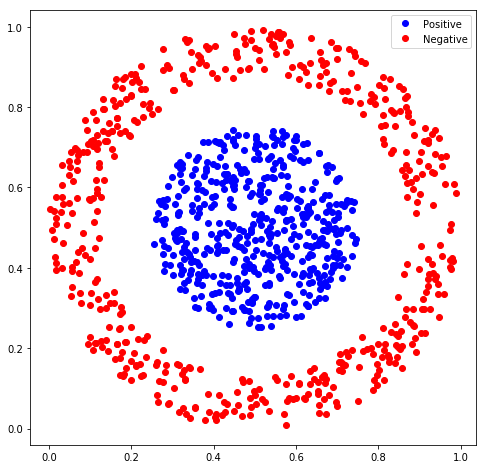

In [36]:
net.plot_activation_map()
scatter([
         ["Positive", "bo", positives], 
         ["Negative", "ro", negatives],
        ], height=8.0, width=8.0)

In [37]:
net.get_weights("hidden")

[[[9.423173904418945,
   6.245722770690918,
   -0.049570176750421524,
   11.471480369567871,
   7.037965774536133],
  [8.224408149719238,
   -6.0211100578308105,
   12.98953914642334,
   1.896003246307373,
   -4.826512813568115]],
 [-5.261712074279785,
  -2.9890401363372803,
  -9.132384300231934,
  -3.486058235168457,
  -3.164877414703369]]

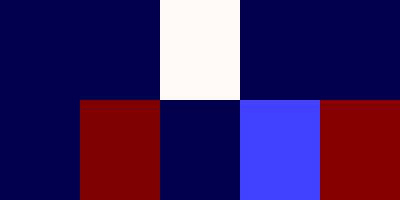

In [38]:
net.get_weights_as_image("hidden").resize((400, 200))

In [39]:
net.get_weights("output")

[[[8.469895362854004],
  [-9.634320259094238],
  [-12.836596488952637],
  [9.934249877929688],
  [-10.639060020446777]],
 [-8.496011734008789]]

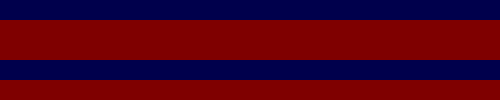

In [40]:
net.get_weights_as_image("output").resize((500, 100))

In [41]:
for y in frange(0, 1.1, .1):
    for x in frange(1.0, 0.1, -0.1):
        print(ascii(net.propagate([x, y])[0]), end=" ")
    print()

 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.3  0.7  0.6  0.1  0.0 
 0.0  0.0  0.0  0.4  0.9  1.0  1.0  0.7  0.0 
 0.0  0.0  0.3  0.9  1.0  1.0  1.0  1.0  0.2 
 0.0  0.1  0.7  1.0  1.0  1.0  1.0  1.0  0.6 
 0.0  0.2  0.8  1.0  1.0  1.0  1.0  1.0  0.6 
 0.0  0.1  0.4  0.8  0.9  0.9  0.9  0.7  0.1 
 0.0  0.0  0.1  0.2  0.3  0.3  0.3  0.1  0.0 
 0.0  0.0  0.0  0.1  0.1  0.1  0.1  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 


In [42]:
net = Network("Non-Linearly Separable", 2, 5, 2, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

In [43]:
net.set_dataset(ds)

In [44]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=1.0, continuous_update=False, description='Zoom', max=3.0, min=0.5), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=2.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=3, options=('input', 'hidden1', 'hidden2', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPEBAY8AAM8AAAEB8q8AAAAAbwAAsAAAkAAA0PTo8vr3+wAAV0dH/7e3//9WVv/W1hYW/zQ0/2dn/4aG/6Sk/9nZ//8XF/82Nv9oaP+Xl/+1tSQk/1lZ/3h4/5SU/8nJ//8mJv9ERP95ef+Hh/+mpv/ExH8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [45]:
net.reset()

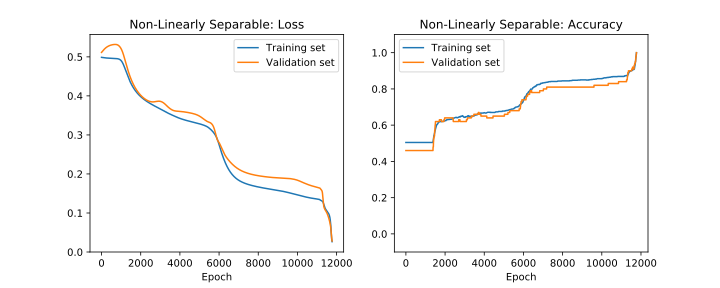

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#11770 |   0.02645 |   1.00000 |   0.02811 |   1.00000 


In [46]:
net.train(epochs=25000, accuracy=1.0, report_rate=50, 
          tolerance=0.4, batch_size=len(net.dataset.train_inputs), 
         plot=True)

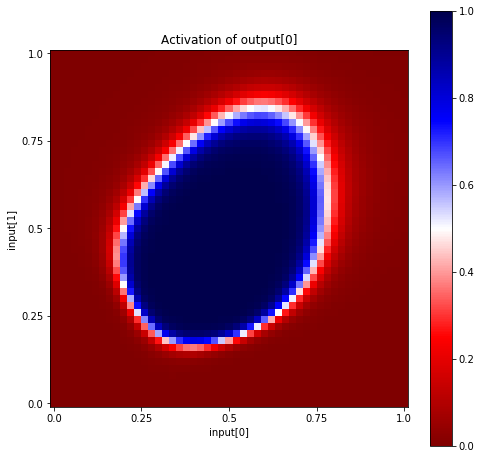

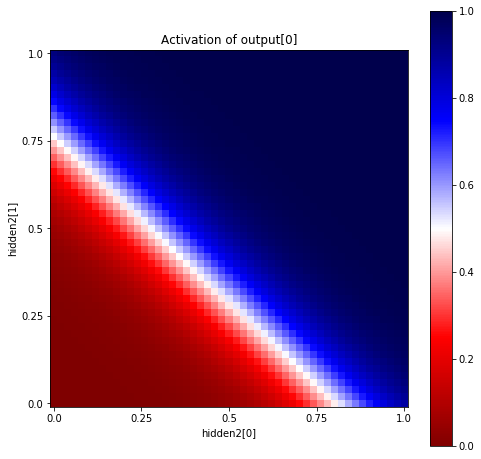

In [48]:
net.plot_activation_map()
net.plot_activation_map("hidden2")

In [49]:
neg = []
pos = []

for (i, o) in zip(net.dataset.inputs, net.dataset.targets):
    hidden2_output = net.propagate_to("hidden2", i, visualize=False)
    if o[0] == 1.0:
        pos.append(hidden2_output)
    else:
        neg.append(hidden2_output)

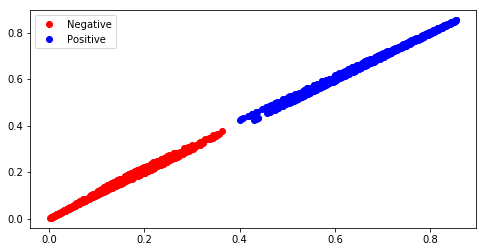

In [50]:
scatter([
    ["Negative", "ro", neg],
    ["Positive", "bo", pos],
])